21.0
35.0
39.0
40.0
48.0
48.0
49.0
50.0
50.0
53.0


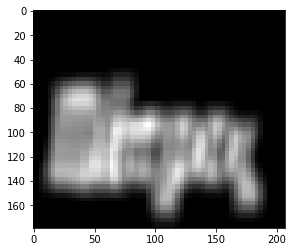

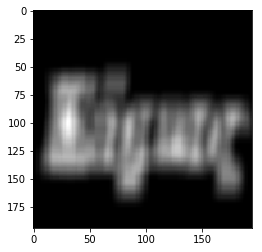

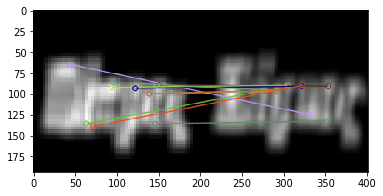

In [115]:


import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('tmp1/ppp2.png',0)          # queryImage
img2 = cv2.imread('tmp1/ppp1.png',0) # trainImage


#img1 = cv2.imread('tmp1/kyrios.png',0)          # queryImage
#img2 = cv2.imread('tmp1/kyrios2.png',0) # trainImage

# ORB Detector
orb = cv2.ORB_create()
#orb = cv2.ORB_create(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.2, 
                     #WTA_K=2,scoreType=cv2.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=22)

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# Brute Force Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
#bf = cv2.BFMatcher()
matches = bf.match(des1, des2)

#matches = bf.knnMatch(des1,des2, 2)


matches = sorted(matches, key = lambda x:x.distance)
sum=0
for i in range(10):
    print(matches[i].distance)
    sum=sum+matches[i].distance


    
    

matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
#print(matching_result)
#
plt.figure()
plt.imshow(img1, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')
 
plt.figure()
plt.imshow(matching_result, cmap='gray')
 

(194, 195)
38


0.0

(118, 118)
16
68.0
52.0
26.0
26.0
sum= 172.0
172.0


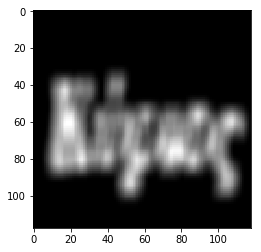

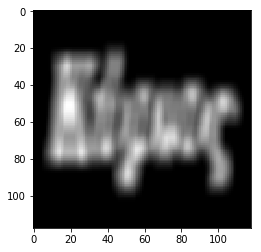

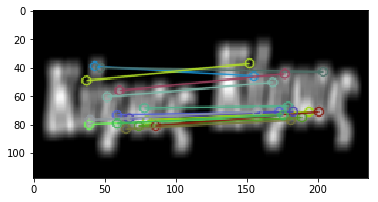

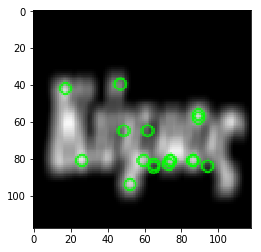

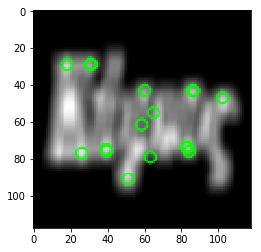

In [146]:
import numpy as np
import cv2
from matplotlib import pyplot as plt







def createPadding(img, margin):
    w=img.shape[1]
    
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)     
    h=img.shape[0]
    
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)  
    return img 
        
    

    

    
def createDensity(img):   
    newX=128
    newY=128
    #file="word/pneuma.png"
    #img=cv2.imread(file,0)
    img=createPadding(img, 10)
    img = cv2.resize(img,(int(newX),int(newY)))   
    kernel=10
    img=255-img 
    #print(img.shape)
    for col in range(newX-kernel):
        for row in range(newY-kernel):
            sum=0
            for i in range(kernel):
                for j in range(kernel):   
                    sum=sum+img[row+j,col+i]    
            img[row,col]=sum/kernel**2         
    #print(img.shape)
   
    return img[0:newX-kernel,0:newY-kernel]


def compareViaORB(img1,img2):
    # ORB Detector
    orb = cv2.ORB_create()
    
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    # Brute Force Matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    #bf = cv2.BFMatcher()
    matches = bf.match(des1, des2)
    #matches = sorted(matches, key = lambda x:x.distance)
    matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:15], None, flags=2)
    print(len(matches))
    sum=0
    for i in range(len(matches)):
            if i >3: 
                continue
            #
            print(matches[i].distance)
            sum=sum+matches[i].distance
    print("sum=",sum)
        
    return sum,matching_result



#img1 = cv2.imread('tmp1/ppp2.png',0) # queryImage 
img1=cv2.imread("tmp1/kyrios4.png",0) 

img2=cv2.imread("test/0185.pdf300/944-1520-117-36.png",0) 
img2=cv2.imread("tmp1/kyrios.png",0) 

img1=createDensity(img1)
img2=createDensity(img2)
print(img1.shape)


plt.figure()
plt.imshow(img1,cmap="gray")
plt.figure()
plt.imshow(img2,cmap="gray")

sum, drawmatches=compareViaORB(img1,img2)

plt.figure()
plt.imshow(drawmatches,cmap="gray")
print(sum)


######################



######################
img1=img1.copy()
img2=img2.copy()


orb = cv2.ORB_create(edgeThreshold=15, patchSize=31, nlevels=8, fastThreshold=20, scaleFactor=1.8, 
                     WTA_K=2,scoreType=cv2.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=22)
#orb = cv2.ORB_create()
#kp1 = orb.detect(img1)
#kp2 = orb.detect(img2)


kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# Brute Force Matching
###bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
#bf = cv2.BFMatcher()
###matches = bf.match(des1, des2)






img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), \
        flags=cv2.DrawMatchesFlags_DEFAULT)
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), \
        flags=cv2.DrawMatchesFlags_DEFAULT)

plt.figure()
plt.imshow(img1_kp)
plt.figure()
plt.imshow(img2_kp)
plt.show()




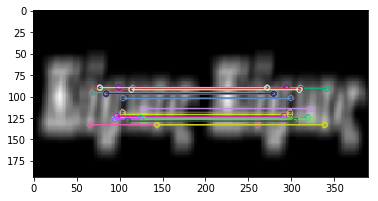

(<matplotlib.image.AxesImage at 0x7f800671d898>, None)

In [148]:
# This time, we will use BFMatcher.knnMatch() to get k best matches. 
# In this example, we will take k=2 so that we can apply ratio test 
# explained by D.Lowe in his paper. 

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('tmp1/ppp.png',0)          # queryImage
img2 = cv.imread('tmp1/ppp1.png',0) # trainImage

method = 'ORB'  # 'SIFT'
lowe_ratio = 0.89

if method   == 'ORB':
    finder = cv.ORB_create()
elif method == 'SIFT':
    finder = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = finder.detectAndCompute(img1,None)
kp2, des2 = finder.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []

for m,n in matches:
    if m.distance < lowe_ratio*n.distance:
        good.append([m])
        #print(m.distance )
        #print(n.distance )
msg1 = 'using %s with lowe_ratio %.2f' % (method, lowe_ratio)
msg2 = 'there are %d good matches' % (len(good))

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good, None, flags=2)

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img3,msg1,(10, 250), font, 0.5,(255,255,255),1,cv.LINE_AA)
cv.putText(img3,msg2,(10, 270), font, 0.5,(255,255,255),1,cv.LINE_AA)
#fname = 'output_%s_%.2f.png' % (method, magic_number)
#cv.imwrite(fname, img3)

plt.imshow(img3),plt.show()
 